# Importing libraries

In [151]:
#importing libraries

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import warnings
warnings.filterwarnings('ignore')


# Local Data Combination (Root Directory)
Some folders did not have the month column hence a column was created in those files using the file names.
Proceeded to combine the files into folders based on the years and ensure consistency with the file columns.
The file combination did not include the YTD files as they were not cosistent in all the folders.

In [111]:
'''
# Base path and output folder
base_dir = 'Raw Data'
combined_folder = 'combined_data'
os.makedirs(combined_folder, exist_ok=True)

# Step 1: Fix missing 'month' column for 2021 and 2022
def fix_missing_month_column(base_dir, years_to_fix):
    for year in years_to_fix:
        print(f"\n Fixing missing 'month' column for {year}...")
        year_path = os.path.join(base_dir, year)

        for root, _, files in os.walk(year_path):
            for file in files:
                if file.endswith('.csv') and 'ytd' not in file.lower():
                    file_path = os.path.join(root, file)
                    try:
                        df = pd.read_csv(file_path)
                        df.columns = df.columns.str.lower().str.strip()

                        if 'month' not in df.columns:
                            folder_name = os.path.basename(root)
                            df['month'] = folder_name
                            df.to_csv(file_path, index=False)
                            print(f"✓ Added 'month' to {file} (Folder: '{folder_name}')")
                        else:
                            print(f"• Skipped (already has 'month'): {file}")
                    except Exception as e:
                        print(f"✗ Error processing {file}: {e}")

# Step 2: Combine files with column consistency
def combine_yearly_files(base_dir, years_to_combine, combined_folder):
    for year in years_to_combine:
        dataframes = []
        year_path = os.path.join(base_dir, year)
        expected_columns = None
        mismatched_files = []

        print(f"\n Combining files for {year}...")

        for root, _, files in os.walk(year_path):
            for file in files:
                if file.endswith('.csv') and 'ytd' not in file.lower():
                    file_path = os.path.join(root, file)
                    try:
                        df = pd.read_csv(file_path)
                        df.columns = df.columns.str.lower().str.strip()

                        # Set expected columns from the first file
                        if expected_columns is None:
                            expected_columns = list(df.columns)
                        else:
                            # Check if columns match
                            if list(df.columns) != expected_columns:
                                mismatched_files.append((file_path, list(df.columns)))
                                continue  # Skip this file

                        dataframes.append(df)
                    except Exception as e:
                        print(f"✗ Error reading {file_path}: {e}")

        # Report any mismatched files
        if mismatched_files:
            print(f" Column mismatches in {year} (skipping these files):")
            for path, cols in mismatched_files:
                print(f"  - {path}\n    Columns: {cols}")

        # Combine consistent files
        if dataframes:
            combined_df = pd.concat(dataframes, ignore_index=True)
            output_path = os.path.join(combined_folder, f"{year}_combined.csv")
            combined_df.to_csv(output_path, index=False)
            print(f" {year} combined and saved to {output_path}")
        else:
            print(f" No consistent non-YTD files found for {year}")

# Run steps
fix_missing_month_column(base_dir, years_to_fix=['2021', '2022'])
combine_yearly_files(base_dir, years_to_combine=['2020', '2021', '2022', '2023', '2024'], combined_folder=combined_folder)
''' 

'\n# Base path and output folder\nbase_dir = \'Raw Data\'\ncombined_folder = \'combined_data\'\nos.makedirs(combined_folder, exist_ok=True)\n\n# Step 1: Fix missing \'month\' column for 2021 and 2022\ndef fix_missing_month_column(base_dir, years_to_fix):\n    for year in years_to_fix:\n        print(f"\n Fixing missing \'month\' column for {year}...")\n        year_path = os.path.join(base_dir, year)\n\n        for root, _, files in os.walk(year_path):\n            for file in files:\n                if file.endswith(\'.csv\') and \'ytd\' not in file.lower():\n                    file_path = os.path.join(root, file)\n                    try:\n                        df = pd.read_csv(file_path)\n                        df.columns = df.columns.str.lower().str.strip()\n\n                        if \'month\' not in df.columns:\n                            folder_name = os.path.basename(root)\n                            df[\'month\'] = folder_name\n                            df.to_csv(fil

#### Reading Datasets
Created dataframes for the various folders(years) and read them.

In [112]:
shipping_20 = pd.read_csv('combined_data/2020_combined.csv')
shipping_21 = pd.read_csv('combined_data/2021_combined.csv')
shipping_22 = pd.read_csv('combined_data/2022_combined.csv')
shipping_23 = pd.read_csv('combined_data/2023_combined.csv')
shipping_24 = pd.read_csv('combined_data/2024_combined.csv')

### Data Cleaning
checked for number of missing data with the pwercentage missing and duplicates per column.
Mextate, df and canprove had missing data in all datasets from 2020 to 2024
Mextate had the largest percentage of missing data

In [113]:

# Dictionary of your loaded DataFrames
datasets = {
    '2020_combined.csv': shipping_20,
    '2021_combined.csv': shipping_21,
    '2022_combined.csv': shipping_22,
    '2023_combined.csv': shipping_23,
    '2024_combined.csv': shipping_24
}

# Loop through each DataFrame
for name, df in datasets.items():
    total_rows = len(df)

    # Check for missing values
    missing_count = df.isnull().sum()
    missing_percent = (missing_count / total_rows) * 100
    total_missing = missing_count.sum()

    # Check for duplicates
    duplicate_rows = df.duplicated().sum()

    print(f"\n {name}")
    print(f"→ Total rows: {total_rows}")
    print(f"→ Total missing values: {total_missing}")

    if total_missing > 0:
        missing_df = pd.DataFrame({
            'Missing Values': missing_count,
            'Percentage (%)': missing_percent
        })
        missing_df = missing_df[missing_df['Missing Values'] > 0]
        print("Missing values by column:")
        print(missing_df.sort_values(by='Percentage (%)', ascending=False))
    else:
        print("No missing values.")
    
    print(f"→ Duplicate rows: {duplicate_rows}")



 2020_combined.csv
→ Total rows: 180588
→ Total missing values: 263171
Missing values by column:
          Missing Values  Percentage (%)
mexstate          128851       71.350810
df                 68901       38.153698
canprov            65419       36.225552
→ Duplicate rows: 0

 2021_combined.csv
→ Total rows: 300092
→ Total missing values: 436906
Missing values by column:
          Missing Values  Percentage (%)
mexstate          212481       70.805286
df                114032       37.999014
canprov           110393       36.786386
→ Duplicate rows: 0

 2022_combined.csv
→ Total rows: 338101
→ Total missing values: 491412
Missing values by column:
          Missing Values  Percentage (%)
mexstate          241444       71.411797
df                127609       37.742864
canprov           122359       36.190073
→ Duplicate rows: 0

 2023_combined.csv
→ Total rows: 341668
→ Total missing values: 495541
Missing values by column:
          Missing Values  Percentage (%)
mexstate       

#### BUSINESS QUESTIONS
 1.	Does the use of containers affect freight charges. (Infrastructure Investment)
 2. The influence of containments on the weights of shipments.
 3. The origin of goods across partner countries.
 4. Identify the monthly distribution of imports vrs Exports.
 5. Identifying the Frequently used mode of transport.
 6. Which trade type brings in the highest revenue.(Trade Deficits)
 7.	Which countries imports or exports more.(Market Prioritization)

##### Handling Missing Values
In handling our missing values, decisions have to be in line with our business questions.   
Based on the business questions the Mexstate and Canprove columns were dropped as they do not help answer our business questions.
Kept the DF column and treated the missing values as merchandise with unspecified origin.

In [114]:

# Columns to drop
columns_to_drop = ['mexstate', 'canprov']

# Dictionary of DataFrames
datasets = {
    '2020_combined.csv': shipping_20,
    '2021_combined.csv': shipping_21,
    '2022_combined.csv': shipping_22,
    '2023_combined.csv': shipping_23,
    '2024_combined.csv': shipping_24
}

# Process each in-memory DataFrame
for name, df in datasets.items():
    # Drop only the columns that exist
    existing_cols = [col for col in columns_to_drop if col in df.columns]
    df.drop(columns=existing_cols, inplace=True)
    print(f" Sucessfully Dropped {existing_cols} from {name}")


 Sucessfully Dropped ['mexstate', 'canprov'] from 2020_combined.csv
 Sucessfully Dropped ['mexstate', 'canprov'] from 2021_combined.csv
 Sucessfully Dropped ['mexstate', 'canprov'] from 2022_combined.csv
 Sucessfully Dropped ['mexstate', 'canprov'] from 2023_combined.csv
 Sucessfully Dropped ['mexstate', 'canprov'] from 2024_combined.csv


In [115]:
# Replacement value
replacement_value = 'Unspecified'

# Dictionary of DataFrames
datasets = {
    '2020_combined.csv': shipping_20,
    '2021_combined.csv': shipping_21,
    '2022_combined.csv': shipping_22,
    '2023_combined.csv': shipping_23,
    '2024_combined.csv': shipping_24
}

# Replace missing 'df' values
for name, df in datasets.items():
    if 'df' in df.columns:
        missing_count = df['df'].isna().sum()
        df['df'].fillna(replacement_value, inplace=True)
        print(f" Replaced {missing_count} missing 'df' values in {name}")
    else:
        print(f" 'df' column not found in {name}")


 Replaced 68901 missing 'df' values in 2020_combined.csv
 Replaced 114032 missing 'df' values in 2021_combined.csv
 Replaced 127609 missing 'df' values in 2022_combined.csv
 Replaced 128111 missing 'df' values in 2023_combined.csv
 Replaced 96452 missing 'df' values in 2024_combined.csv


##### DATA MAPPING - Defining Data variables
The dataset has columns filed with numbers which has meanings (codes).
Creating a temporary mapping to avoid changes to the dataset. This temporal mapping is done to prevent changes on our main dataset.

In [116]:
# --- 1. Define all mappings ---
'''
commodity_map = {
    1: 'Live animals', 2: 'Meat', 3: 'Fish', 4: 'Dairy, Honey, etc.',
    5: 'Other animal products', 6: 'Live plants', 7: 'Vegetables',
    8: 'Fruits and nuts', 9: 'Coffee, tea, spices', 10: 'Cereals',
    11: 'Milling products', 12: 'Oil seeds', 13: 'Gums and resins',
    14: 'Veg. plaiting', 15: 'Fats and oils', 16: 'Prepared meat/fish',
    17: 'Sugar', 18: 'Cocoa', 19: 'Cereal preparations', 20: 'Veg./fruit preparations',
    21: 'Misc. edible', 22: 'Beverages', 23: 'Food waste/feed', 24: 'Tobacco',
    25: 'Salt/stone/cement', 26: 'Ores', 27: 'Mineral fuels', 28: 'Inorganic chemicals',
    29: 'Organic chemicals', 30: 'Pharma products', 31: 'Fertilizers',
    32: 'Dyes & paints', 33: 'Essential oils & cosmetics', 34: 'Soaps & waxes',
    35: 'Starches, glues, enzymes', 36: 'Explosives & matches', 37: 'Photographic goods',
    38: 'Misc chemicals', 39: 'Plastics', 40: 'Rubber', 41: 'Raw hides & leather',
    42: 'Leather articles', 43: 'Furskins', 44: 'Wood', 45: 'Cork', 46: 'Basketware',
    47: 'Pulp & scrap paper', 48: 'Paper articles', 49: 'Books & printed goods',
    50: 'Silk', 51: 'Wool', 52: 'Cotton', 53: 'Other textiles', 54: 'Man-made filaments',
    55: 'Man-made fibers', 56: 'Ropes & twine', 57: 'Carpets', 58: 'Special woven fabrics',
    59: 'Industrial textiles', 60: 'Knitted fabrics', 61: 'Knit apparel', 62: 'Woven apparel',
    63: 'Other textile articles', 64: 'Footwear', 65: 'Headgear', 66: 'Umbrellas & sticks',
    67: 'Feathers & artificial flowers', 68: 'Stone & cement articles', 69: 'Ceramics',
    70: 'Glassware', 71: 'Jewelry & coins', 72: 'Iron & steel', 73: 'Iron/steel articles',
    74: 'Copper', 75: 'Nickel', 76: 'Aluminum', 77: 'Reserved', 78: 'Lead',
    79: 'Zinc', 80: 'Tin', 81: 'Other base metals', 82: 'Tools & cutlery',
    83: 'Misc base metal', 84: 'Machinery', 85: 'Electrical machinery', 86: 'Railway equipment',
    87: 'Vehicles', 88: 'Aircraft', 89: 'Ships', 90: 'Instruments', 91: 'Watches',
    92: 'Musical instruments', 93: 'Arms & ammo', 94: 'Furniture & prefab', 95: 'Toys & sports',
    96: 'Misc manufactured', 97: 'Art & antiques', 98: 'Special classification', 99: 'Temporary (imports only)'
}
'''
trade_type_mapping = {
    1: "Export",
    2: "Import"
}

disagmot_mapping = {
    1: "Vessel",
    3: "Air",
    4: "Mail (U.S. Postal Service)",
    5: "Truck",
    6: "Rail",
    7: "Pipeline",
    8: "Other",
    9: "Foreign Trade Zones (FTZs)"
}

country_mapping = {
    1220: 'Canada',
    2010: 'Mexico'
}

df_mapping = {
    1: 'domestically produced merchandise',
    2: 'foreign produced merchandise', 
    'Unspecified': 'Unspecified'
}

contcode_mapping = {
    'X':'Containerized',
    0: 'Non-Containerized',
    1: 'unspecified',
    '0': 'Non-Containerized',
    '1': 'unspecified'
}

month_mapping = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

def get_mapped_copy(df):
    return df.copy().assign(
        trdtype     = df['trdtype'].map(trade_type_mapping),
        disagmot    = df['disagmot'].map(disagmot_mapping),
        country     = df['country'].map(country_mapping),
        df          = df['df'].map(df_mapping),
        contcode    = df['contcode'].map(contcode_mapping),
        month       = df['month'].map(month_mapping)
    )



##### EXPLORATORY DATA ANALYSIS
This will tell in detail, what the dataset is entails.
Combined all existing dataframes into one. In exploring the data, the temporary dataset is what will be used. This will help us understand the data in detail and relate the data to what it truly means. 

In [117]:
# Combine all years into one DataFrame
combined_shipping = pd.concat(
    [shipping_20, shipping_21, shipping_22, shipping_23, shipping_24],
    ignore_index=True
)

In [118]:
# assigning the temporary mapped dataset
mapped_combined = get_mapped_copy(combined_shipping)


In [119]:
mapped_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421552 entries, 0 to 1421551
Data columns (total 12 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   trdtype          1421552 non-null  object
 1   usastate         1421552 non-null  object
 2   depe             1421552 non-null  object
 3   disagmot         1421552 non-null  object
 4   country          1421552 non-null  object
 5   value            1421552 non-null  int64 
 6   shipwt           1421552 non-null  int64 
 7   freight_charges  1421552 non-null  int64 
 8   df               1421552 non-null  object
 9   contcode         1421552 non-null  object
 10  month            1421552 non-null  object
 11  year             1421552 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 130.1+ MB


In [120]:
# year is not an integer and hence should be changed
mapped_combined['year'] = mapped_combined['year'].astype(str)


In [121]:
# checking to see if it worked
mapped_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421552 entries, 0 to 1421551
Data columns (total 12 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   trdtype          1421552 non-null  object
 1   usastate         1421552 non-null  object
 2   depe             1421552 non-null  object
 3   disagmot         1421552 non-null  object
 4   country          1421552 non-null  object
 5   value            1421552 non-null  int64 
 6   shipwt           1421552 non-null  int64 
 7   freight_charges  1421552 non-null  int64 
 8   df               1421552 non-null  object
 9   contcode         1421552 non-null  object
 10  month            1421552 non-null  object
 11  year             1421552 non-null  object
dtypes: int64(3), object(9)
memory usage: 130.1+ MB


In [122]:
# Description of numerical columns
mapped_combined.describe()

,value,shipwt,freight_charges
count,1.421552e+06,1.421552e+06,1.421552e+06
mean,4.334928e+06,1.746642e+06,5.651869e+04
std,4.731744e+07,4.807430e+07,1.192638e+06
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.994600e+04,0.000000e+00,0.000000e+00
50%,1.039605e+05,3.000000e+00,3.820000e+02
75%,6.711342e+05,9.480250e+03,3.785000e+03
max,4.951806e+09,8.563936e+09,2.275531e+08


## Summary Analysis of Trade-Related Metrics

This section provides a detailed overview of three key numerical trade-related metrics: **`value`**, **`shipwt`** (shipment weight), and **`freight_charges`**. 
These figures help in understanding trade intensity, shipment scale, and logistics cost patterns over time.

1. **Value (`value`)**
Represents the total monetary worth of traded goods.
With a mean of $4.33 million, this shows that on average, transactions are of high monetary value.
With a median of $103,961, this is significantly lower than the mean, suggesting a right-skewed distribution some very large transactions.
With min amount of $0 and a maximum amount of$4.95 billion. this shows that some trades report no value, while others reach nearly $5 billion.
The wide range and high standard deviation imply the presence of large outliers, possibly from high-value commodities or consolidated shipments.

2. **Shipment Weight (`shipwt`)**
Indicates the weight (in kilograms) of goods transported.
With a mean of 1.75 million units, average shipment is heavy, potentially pointing to bulk commodity movements.

3. **Freight Charges (`freight_charges`)**
The cost incurred in transporting the goods.
With a mean of $56,518, this reflects both long distances and expensive transport modes.
With a median of $382 indicates that most shipments are low-cost, but a few incur very high charges.
With a min and max amount ranging from $0 to $227.5 million, the skewness suggests the influence of **very costly outliers**, such as specialized or high-risk cargo.

Despite significant advancements in trade logistics, challenges such as **congestion, safety, infrastructure stress, environmental impact, and economic disruptions** persist. This analysis aims to **uncover insights** around these issues by studying key variables like shipment value, weight, and freight charges.

Proceeding to have a view of some of our categorical columns which includes trade type, df(domestic or foreign or unspecified and the contcode)

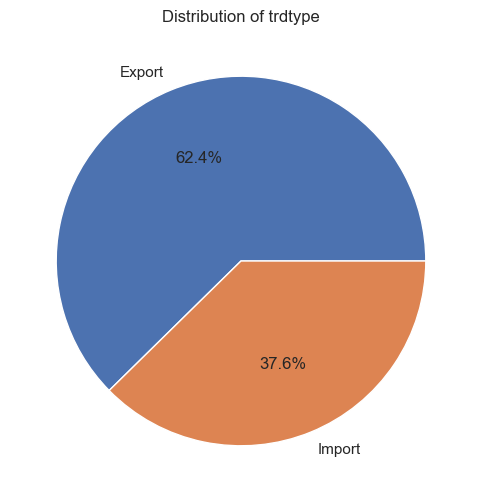

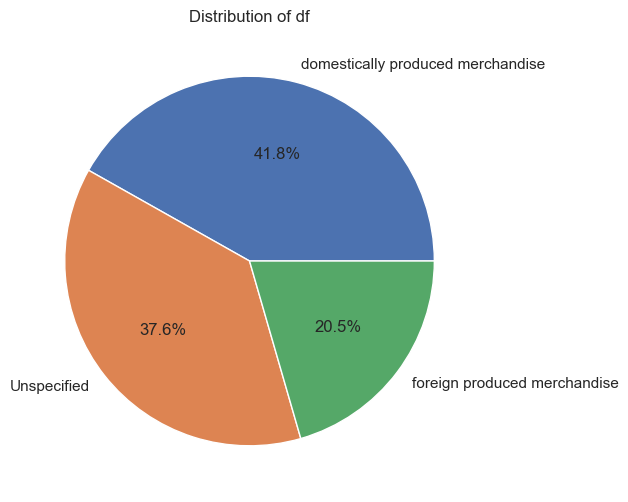

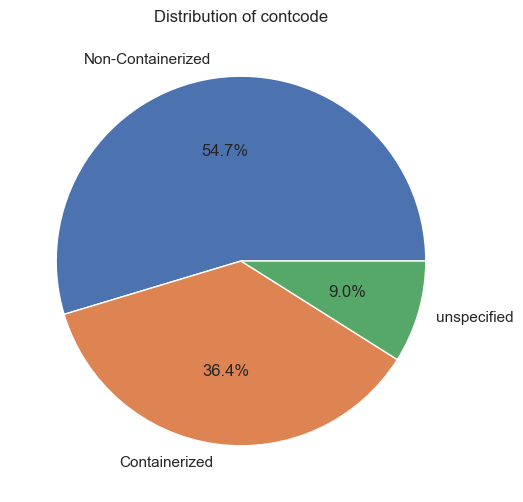

In [123]:
simple_cats = ['trdtype', 'df', 'contcode']

for col in simple_cats:
    if col in mapped_combined.columns:
        mapped_combined[col].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6, 6), title=f"Distribution of {col}")
        plt.ylabel('')
        plt.show()


# Exploratory Data Analysis (EDA) Summary

## 1. Trade Type Distribution

The dataset indicates a significant imbalance between export and import freight activity:

- **Exports:** 62.4%
- **Imports:** 37.6%

**Insights**:
- Exports dominate trade activity, suggesting strong outbound trade performance.
- Strategic focus should be placed on optimizing export logistics, pricing, and throughput.
- Import operations may offer room for growth or improved efficiency.

## 2. Origin of Goods (Domestic vs Foreign)

Distribution by origin of goods reveals:

- **Domestic Goods:** 41.8%
- **Foreign Goods:** 20.5%
- **Unspecified Origin:** 37.6%

**Insights**:
- A large share of goods are of **domestic origin**, indicating local production or value addition.
- The high proportion of **unspecified origin (37.6%)** highlights data quality issues, which could affect deeper trade analytics.
- Improved data labeling and collection on origin can enhance trade flow and compliance analysis.

## 3. Containerization (contcode)

Distribution by container status:

- **Non-containerized:** 54.7%
- **Containerized:** 36.4%
- **Unspecified:** 9.0%

**Insights**:
- **Non-containerized cargo is the majority**, possibly indicating bulk or break-bulk commodities (e.g., raw materials, heavy equipment).
- **Containerized cargo**, though smaller, may represent high-value or standardized goods.
- A **9.0% unspecified rate** suggests a need for better classification during cargo intake or documentation.

## Summary Recommendations

- **Improve Data Quality**: High levels of "unspecified" entries across multiple features (origin, contcode) warrant attention to improve future analyses.
- **Export-Focused Strategies**: Given exports dominate trade activity, logistics planning, pricing models, and infrastructure should prioritize outbound efficiency.
- **Bulk Logistics Optimization**: With over half of cargo being non-containerized, invest in handling equipment and processes tailored to bulk operations.
- **Import Growth Potential**: Imports represent a smaller share; exploring trade policies or partner countries may help diversify inbound flows.


# Answering Business Questions
How the use of containers influence freight charges? This business question helps with logistic efficiency as well as optimizing trade costs.


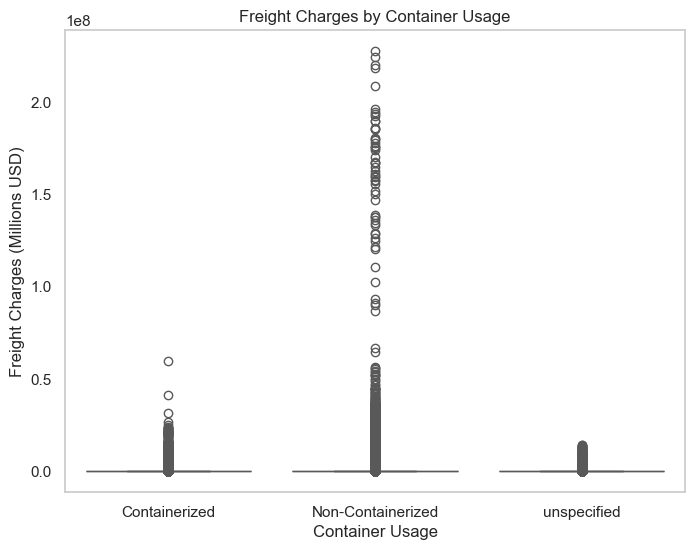

In [125]:
# How the use of containers influence freight charges? 
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(data=mapped_combined, x='contcode', y='freight_charges', palette='Set2')

plt.title('Freight Charges by Container Usage')
plt.ylabel('Freight Charges (Millions USD)')
plt.xlabel('Container Usage')
plt.grid(axis='y')
plt.show()


In [129]:
#  testing hypothesis (non-containerized incurs higher freight charges)
from scipy.stats import f_oneway

# Group freight charges by container status
containerized = mapped_combined[mapped_combined['contcode'] == 'Containerized']['freight_charges']
non_containerized = mapped_combined[mapped_combined['contcode'] == 'Non-Containerized']['freight_charges']
unspecified = mapped_combined[mapped_combined['contcode'] == 'unspecified']['freight_charges']

# Perform one-way ANOVA
f_stat, p_value = f_oneway(containerized, non_containerized, unspecified)

print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")



F-statistic: 62.4789
P-value: 0.0000


### Interpreting the results of the hypothesis testing 

The F-statistic measures the ratio of variance between the groups to the variance within the groups. A higher F-value suggests that group means are significantly different.

The p-value is less than 0.05, meaning the result is statistically significant.

Conclusion
There is a statistically significant difference in average freight charges between at least two of the container status groups:
- Containerized
- Non-Containerized
- Unspecified

This supports the hypothesis that container status influences freight charges.

## Impact of Container Usage on Freight Charges

Based on the ANOVA test (F-statistic: 62.4789, p-value: 0.0000), we found a **statistically significant difference** in average freight charges among the three container usage groups: **Containerized, Non-Containerized, and Unspecified**.

---

### Recommendations

#### 1. Encourage Use of Containerized Shipping
- Containerized shipments are associated with **lower average freight charges**.
- Businesses should **prioritize containerized logistics** where possible to optimize shipping costs.

#### 2. Audit Non-Containerized Shipments
- Investigate high-cost non-containerized shipments to:
- Identify opportunities for container conversion.
- Optimize packaging and logistics processes.

#### 3. Investigate 'Unspecified' Container Entries
- A significant number of entries are labeled as "Unspecified", which may obscure analysis.
- Improve documentation and classification at data entry points.
- Ensure container status is accurately recorded for all shipments.

#### 4. Develop Cost Guidelines for Logistics Teams
- Use container-type-specific freight cost averages to create **internal cost benchmarks**.
- Help logistics teams make **cost-effective shipping decisions** based on data.

#### 5. Collaborate with Freight Carriers
- Present data showing the **cost benefits of containerization** in negotiations.
- Secure better pricing or incentives for choosing containerized transport.


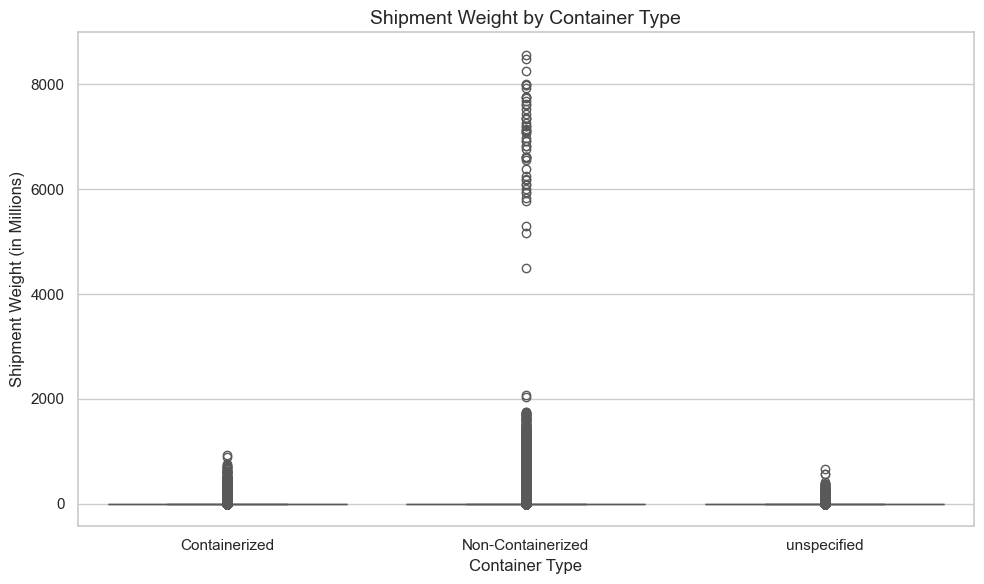

In [132]:
# Second Business Question
# How does the use of containers influence the weight of shipments?

# Convert shipment weight to millions for easier readability
mapped_combined['shipwt_millions'] = mapped_combined['shipwt'] / 1e6

# Set up the plot style
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Create the boxplot
ax = sns.boxplot(x='contcode', y='shipwt_millions', data=mapped_combined, palette='Set2')

# Customize the plot
ax.set_title('Shipment Weight by Container Type', fontsize=14)
ax.set_xlabel('Container Type')
ax.set_ylabel('Shipment Weight (in Millions)')

plt.tight_layout()
plt.show()



# Shipment Weight by Container Type

## Key Observations:
- Non-Containerized shipments show significantly higher variability in shipment weights, including extreme outliers reaching up to 8000+ million units.
- Containerized shipments are more tightly clustered with relatively lower shipment weights.
- The **Unspecified category** tends to follow the same trend as Containerized shipments,
  indicating low weights and fewer extreme values.

## Recommendations:
1. Review Large Non-Containerized Shipments:
   - Investigate the operational, cost, and logistical factors driving extremely high shipment weights in non-containerized shipments.
   - These may be contributing to inefficiencies or elevated freight costs.

2. Encourage Container Usage Where Feasible:
   - Promote the use of containers for large-volume shipments to help standardize handling and reduce risks associated with bulk shipments.

3. Segregate Unspecified Shipments:**
   - Ensure clear classification of shipment types to avoid misinterpretation of trends and improve logistics planning.

The above insights support better decision-making on shipping strategy, cost control, and infrastructure planning in trade logistics.


Third Question 

How does the origin of goods (domestically produced vs. foreign produced) vary across different trading partner countries?

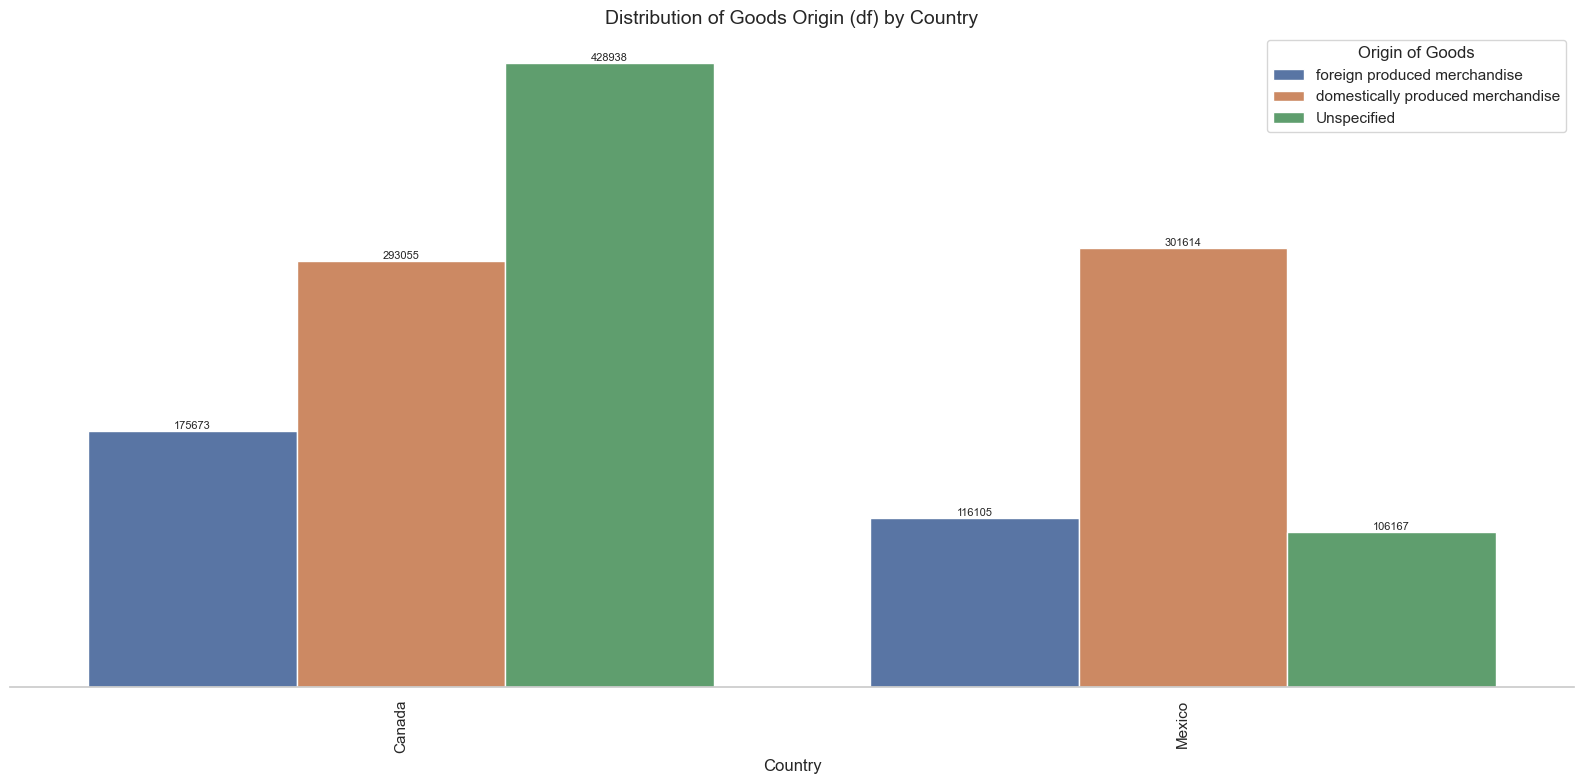

In [134]:

# Set the plot style
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")

# Create the countplot for all countries
ax = sns.countplot(
    data=mapped_combined,
    x='country',
    hue='df'
)

# Add data labels
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(
            p.get_x() + p.get_width() / 2.,
            height + 100,
            f'{int(height)}',
            ha='center',
            va='bottom',
            fontsize=8
        )

# Customize the plot
ax.set_title('Distribution of Goods Origin (df) by Country', fontsize=14)
ax.set_xlabel('Country')
ax.set_ylabel('')
ax.set_yticks([])  # Remove y-axis ticks
plt.xticks(rotation=90)
plt.legend(title='Origin of Goods')
sns.despine(left=True)

plt.tight_layout()
plt.show()


### Distribution of Goods Origin by Country

**Canada**:
   - Has the highest volume of **unspecified origin** shipments.
   - A significant volume of **domestically produced goods** is present.
   - **Foreign-produced goods** are the lowest among the three categories.

 **Mexico**:
   - Dominated by **domestically produced goods**.
   - **Foreign-produced** and **unspecified** categories are relatively lower.

### Recommendations

Improve Data Completeness
- The high proportion of unspecified origins in Canadian records could impact decision-making and trade analytics.
- Collaborate with customs and logistics data providers to enforce stricter data entry and reporting standards, especially for goods origin fields.

Tailored Trade Strategy 
  - For Canada: Focus on identifying sectors contributing most to unspecified entries and improve data clarity.
  - For Mexico: Continue supporting local production and explore infrastructure improvements to sustain export strength.

Operational Efficiency
Review logistics processes (e.g., containerization, customs documentation) for countries with high data ambiguity to streamline supply chains.

Risk and Compliance
- High "unspecified" counts may indicate potential compliance or audit risks.
- Therefore Increase data validation protocols and implement additional checks for high-risk routes and trade partners.

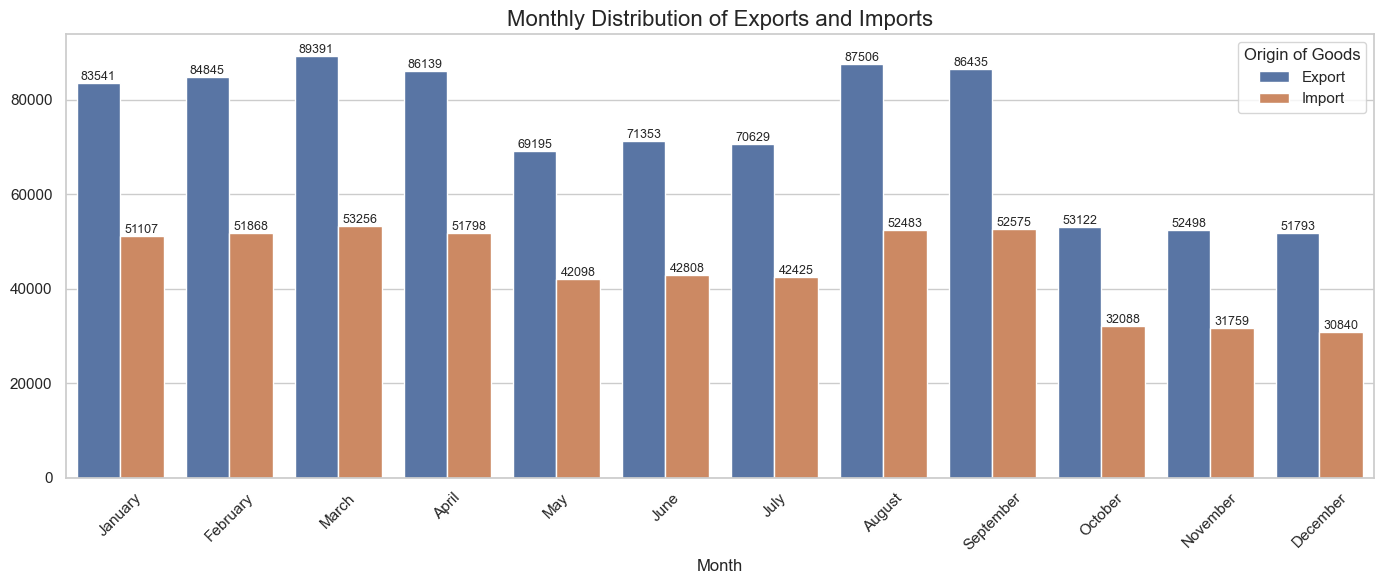

In [ ]:
# 4th Question
# Identify the monthly distribution of imports vrs Exports.

# Ensure seaborn style
sns.set(style="whitegrid")

# Create a month order for better readability if needed
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# If month is numeric, convert to month names
if mapped_combined['month'].dtype != 'O':  # not object (string)
    import calendar
    mapped_combined['month'] = mapped_combined['month'].apply(lambda x: calendar.month_name[int(x)])

# Plot the data
plt.figure(figsize=(14, 6))
ax = sns.countplot(
    data=mapped_combined,
    x='month',
    hue='trdtype',  # differentiates between export/import
    order=month_order
)

# Annotate with data labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', fontsize=9)

# Customize plot
ax.set_title('Monthly Distribution of Exports and Imports', fontsize=16)
ax.set_xlabel('Month')
ax.set_ylabel('')
plt.xticks(rotation=45)
plt.legend(title='Origin of Goods')
plt.tight_layout()

plt.show()


# Monthly Distribution of Exports and Imports

## Key Observations

1. **Exports Consistently Surpass Imports**:
   - Every month, export volume is higher than import volume.
   - Peak export: **March (89,391 units)**.
   - Lowest export: **October (53,122 units)**.

2. **March and August are Strong Export Months**:
   - High volumes observed in **March (89,391)** and **August (87,506)**.
   - These may indicate cyclical peaks or seasonal product trends.

3. **Lowest Volumes in Q4**:
   - **October to December** shows a noticeable decline in both exports and imports.
   - December is the lowest for imports (**30,840 units**) and exports remain moderate (**51,793 units**).

4. **Import Volumes are Relatively Stable Except in Q4**:
   - Ranges from 42,000 to 53,000 for most of the year.
   - Drop to 31,000–32,000 range in **November and December**.

## Recommendations

1. **Capitalize on Peak Months (March & August)**:
   - Plan marketing campaigns, product launches, or high-volume contracts to align with these strong months.
   - Ensure warehouse and logistics readiness for increased outbound activity.

2. **Investigate Q4 Decline**:
   - Analyze causes: holiday closures, budget cycles, policy shifts, or reduced consumer demand.
   - Adjust forecasting and production accordingly.

3. **Boost Import Efficiency in Q4**:
   - Consider stockpiling inventory ahead of Q4 if lower imports are seasonal or supply-related.
   - Explore diversifying suppliers to maintain inventory levels in low-volume months.

4. **Align Freight Strategy with Volume Trends**:
   - Match freight contract terms and container bookings with monthly distribution patterns.
   - Consolidate shipments in lower volume months to reduce per-unit freight costs.

5. **Consider Dynamic Resourcing**:
   - Scale workforce, transport, and storage based on seasonal demand (Q1/Q3 upscaling, Q4 downscaling).
   - Use predictive models to optimize resource allocation.

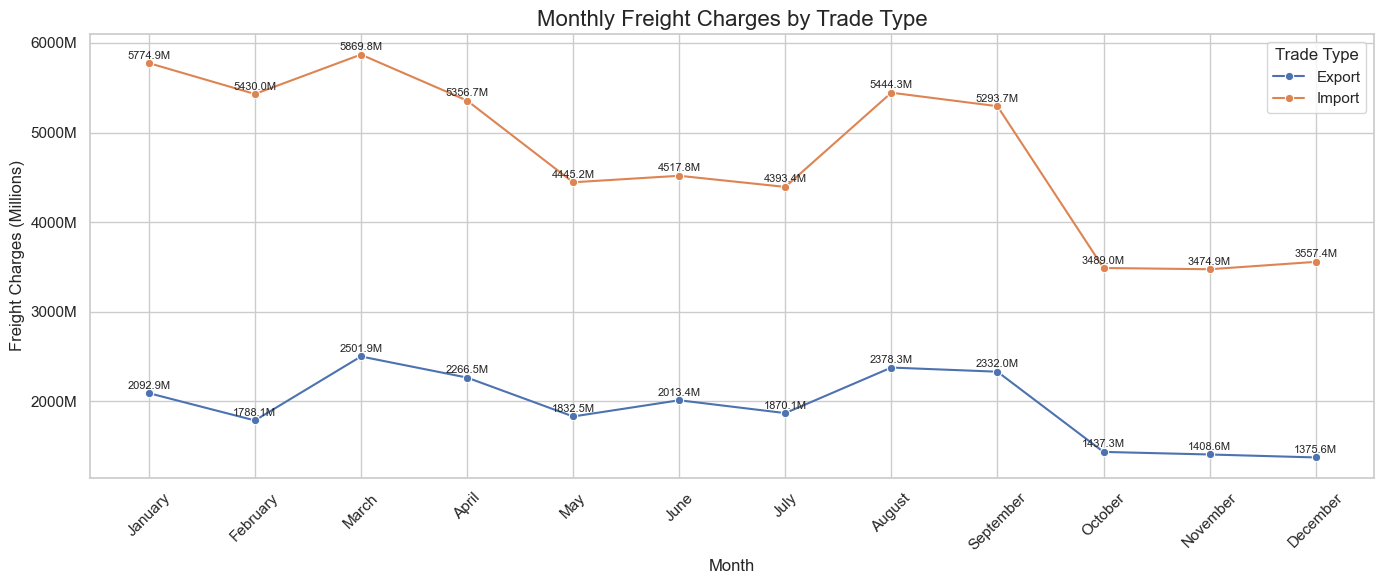

In [ ]:
# 5th Question: What are the monthly trends in freight charges for imports and exports?

# Group by month and trade type, summing freight
monthly_totals = mapped_combined.groupby(['month', 'trdtype'])['freight_charges'].sum().reset_index()

# Ensure correct order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_totals['month'] = pd.Categorical(monthly_totals['month'], categories=month_order, ordered=True)
monthly_totals = monthly_totals.sort_values('month')

# Convert freight to millions for labeling
monthly_totals['freight_million'] = monthly_totals['freight_charges'] / 1e6

# Plot
plt.figure(figsize=(14, 6))
ax = sns.lineplot(
    data=monthly_totals,
    x='month',
    y='freight_million',
    hue='trdtype',
    marker='o'
)

# Add data labels
for line in ax.lines:
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        ax.text(x=x, y=y + 50, s=f'{y:.1f}M', fontsize=8, ha='center')

# Format y-axis to show millions
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.0f}M'))

# Customize appearance
plt.title('Monthly Freight Charges by Trade Type', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Freight Charges (Millions)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Trade Type')
plt.tight_layout()
plt.show()


# Monthly Freight Charges Analysis by Trade Type

1. **Import Charges are Consistently Higher**:
   - Imports consistently incur higher freight charges than exports.
   - Peak: **March (5869.8M)**, Lowest: **October (3489.0M)**.

2. **Export Charges Show Less Volatility**:
   - Peaks observed in **March (2501.9M)** and **August (2378.3M)**.
   - Gradual decline in Q4, ending with **December (1375.6M)**.

3. **Sharp Drop in Both Trade Types in October**:
   - Potential external influence (e.g., holidays, trade policies, port delays).
   - A key month to investigate further.

4. **High Freight Activity in Q1 and Q3**:
   - March and August are top months for both import and export volumes.
   - Indicates seasonality or planned trade surges.

## Recommendations

1. **Investigate the October Drop**:
   - Analyze potential causes: seasonal effects, regulatory changes, or demand shocks.
   - Adjust operational plans or mitigate potential risks during Q4.

2. **Capitalize on Strong Months (March & August)**:
   - Align promotions, contracts, and logistics strategies with these peaks.
   - Ensure supply chain readiness and sufficient transport capacity.

3. **Optimize Import Freight Costs**:
   - Imports form the bulk of freight expenses — consider:
     - Freight consolidation.
     - Rate renegotiation with carriers.
     - Alternative sourcing strategies.

4. **Enhance Export Activity**:
   - Incentivize outbound trade through:
     - Export support programs.
     - Strategic pricing.
     - Exploring new markets.

5. **Integrate Forecasting & Budgeting**:
   - Use monthly trends to forecast future costs.
   - Inform budget allocation and strategic planning on a quarterly basis.

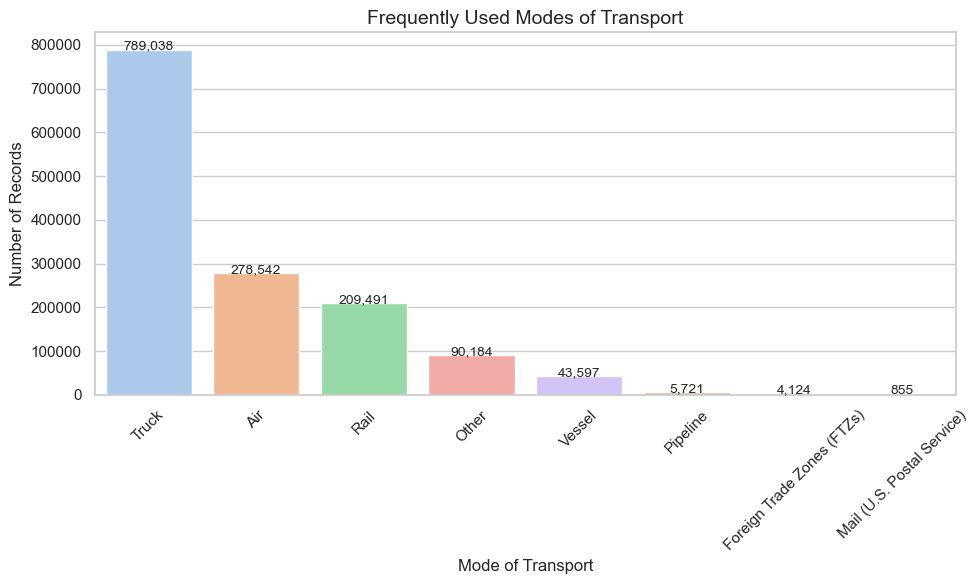

In [ ]:
#6th Question Frequently used mode of transport

# Set the plot style and figure size
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Create a countplot for mode of transport
ax = sns.countplot(
    data=mapped_combined,
    x='disagmot',  # or replace with your transport mode column name
    order=mapped_combined['disagmot'].value_counts().index,
    palette='pastel'
)

# Add data labels
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,
        height + 200,  # slight offset for visibility
        f'{int(height):,}',
        ha="center",
        fontsize=10
    )

# Customize the plot
ax.set_title('Frequently Used Modes of Transport', fontsize=14)
ax.set_xlabel('Mode of Transport')
ax.set_ylabel('Number of Records')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Frequently Used Modes of Transport

The chart reveals that **Truck transport dominates** as the most frequently used mode, with **789,038** recorded instances.
This is followed by **Air (278,542)** and **Rail (209,491)**.

Observations:
- Trucks handle the majority of shipments, indicating a strong reliance on road networks.
- Air and rail follow as secondary modes, likely used for speed and bulk capacity respectively.
- Maritime transport (Vessels), though globally significant, appears underutilized in this dataset with only 43,597 records.
- Pipelines, FTZs, and mail services have minimal activity.

Recommendation:
**Invest in Road Infrastructure**: Prioritize the maintenance and expansion of trucking corridors to support high volume traffic and reduce delays.
**Balance Modal Usage**: Encourage diversification by promoting rail and vessel use where feasible to optimize cost and environmental impact.
**Analyze Bottlenecks**: Conduct further analysis to determine why air and vessel usage is lower. Are there regulatory, capacity, or pricing issues?
**Policy Intervention**: Develop incentives or partnerships to improve infrastructure for underutilized modes (e.g., FTZs or pipelines) for long-term resilience.

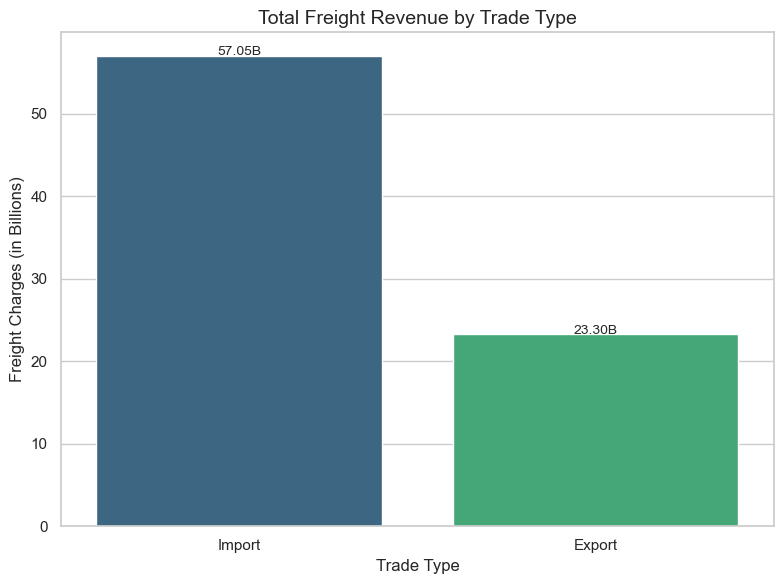

In [ ]:
# Question 7: Which trade type brings in the highest revenue.(Trade Deficits)

# Aggregate total freight charges by trade type (in billions)
trade_revenue = mapped_combined.groupby('trdtype')['freight_charges'].sum().reset_index()
trade_revenue['freight_charges'] = trade_revenue['freight_charges'] / 1_000_000_000  # Convert to billions

# Sort by revenue
trade_revenue = trade_revenue.sort_values(by='freight_charges', ascending=False)

# Set up the plot
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

# Create the barplot
ax = sns.barplot(
    data=trade_revenue,
    x='trdtype',
    y='freight_charges',
    palette='viridis'
)

# Add data labels (in billions)
for p in ax.patches:
    value = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,
        value + 0.05,  # Slightly above the bar
        f'{value:.2f}B',
        ha='center',
        fontsize=10
    )

# Customize the plot
ax.set_title('Total Freight Revenue by Trade Type', fontsize=14)
ax.set_xlabel('Trade Type')
ax.set_ylabel('Freight Charges (in Billions)')
plt.tight_layout()
plt.show()


# Trade Type vs Freight Revenue

From the chart, it is evident that **Imports generate significantly higher freight revenue** than Exports.

Imports account for approximately 57.05 billion in freight charges,
while Exports contribute only about 23.30 billion.

Recommendation:
- **Review Import Cost Structures**: Since imports dominate freight revenue, it's important to evaluate cost-efficiency strategies with freight providers.
- **Explore Export Opportunities**: The relatively lower export freight revenue could indicate untapped potential in export activities. 
Consider developing export incentives, better trade agreements, or expanding markets.
- **Monitor Trade Imbalance Risks**: A consistent revenue gap like this may reflect a trade imbalance. Understanding the underlying causes (demand, policy, logistics) can help inform long-term strategic decisions.

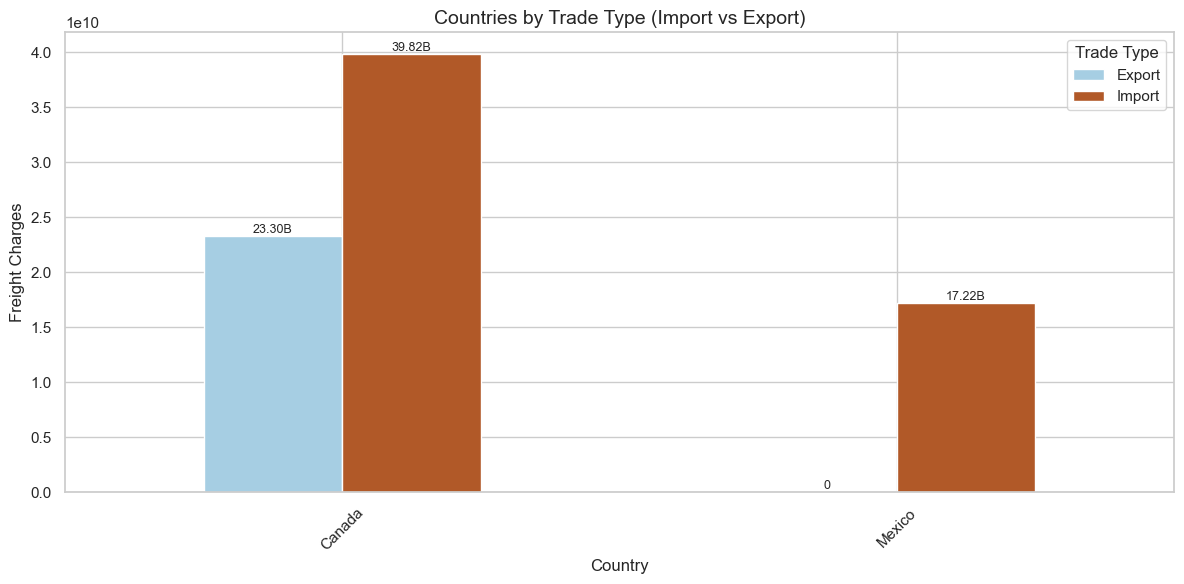

In [ ]:
# Question 8: Which countries imports or exports more. (Market Prioritization)

# Group by country and trade type, summing freight
country_trade = mapped_combined.groupby(['country', 'trdtype'])['freight_charges'].sum().reset_index()

# Pivot for side-by-side comparison
pivot_df = country_trade.pivot(index='country', columns='trdtype', values='freight_charges').fillna(0)

# Calculate total trade volume per country for sorting
pivot_df['Total'] = pivot_df.sum(axis=1)

# Sort by total and take top 10 trading countries
top_countries = pivot_df.sort_values(by='Total', ascending=False).head(10).drop(columns='Total')

# Set plot style
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(12, 6))

# Plot bar chart
top_countries.plot(kind='bar', ax=ax, colormap='Paired')

# Add data labels to each bar
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 1e9:
            label = f'{height / 1e9:.2f}B'
        elif height > 1e6:
            label = f'{height / 1e6:.1f}M'
        else:
            label = f'{height:,.0f}'
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            label,
            ha='center',
            va='bottom',
            fontsize=9
        )

# Customization
ax.set_title('Countries by Trade Type (Import vs Export)', fontsize=14)
ax.set_xlabel('Country')
ax.set_ylabel('Freight Charges')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.legend(title='Trade Type')
plt.tight_layout()
plt.show()


# Countries by Trade Type (Import vs Export)

The bar chart visualizes the total freight charges (in billions) for the top trading countries, categorized by **Import** and **Export** activities.

**Key Observations:**
- **Canada** shows significantly high freight volumes in both exports (23.3B) and imports (39.8B), making it the dominant trade partner.
- **Mexico** reflects a large import volume (~17.2B) but **zero recorded exports**, indicating a trade imbalance.

# Recommendations for Market Prioritization

🇨🇦 Prioritize Canada as a Key Market
- Canada's strong presence in both imports and exports reflects a **mutually beneficial trade relationship**.
- Recommended actions:
  - Strengthen **logistics partnerships**
  - Improve **supply chain efficiency**
  - Optimize **customs processes** for both directions

Explore Export Opportunities to Mexico
- The lack of exports suggests:
  - **Untapped market potential**, or
  - **Regulatory/logistical barriers**
- Next steps:
  - Conduct a **market opportunity assessment**
  - Identify high-demand commodities
  - Engage in bilateral trade facilitation

Address Trade Imbalances
- A high import-only profile (e.g., Mexico) may indicate:
  - **Dependency on foreign goods**
  - **Unsustainable freight spending**
- Risk mitigation:
  - Monitor trade deficits
  - Adjust sourcing or pricing strategies accordingly

Use Freight Volumes for Financial Forecasting
- Freight charges correlate with **trade activity levels**, making them useful for:
  - **Budget forecasting**
  - **Resource allocation**
  - **Performance benchmarking** across routes or countries.
*This analysis supports strategic decisions in trade management, budgeting, and partner prioritization.*
